**Hello Everyone!**

Welcome to my first Kaggle notebook, in this notebook i'm going to present to you a data analysis, hyperparameter tuning and feature analysis using python that i made for the brazilian-house-to-rent dataset from Kaggle, especifically using the dataset houses_to_rent_v2.csv.

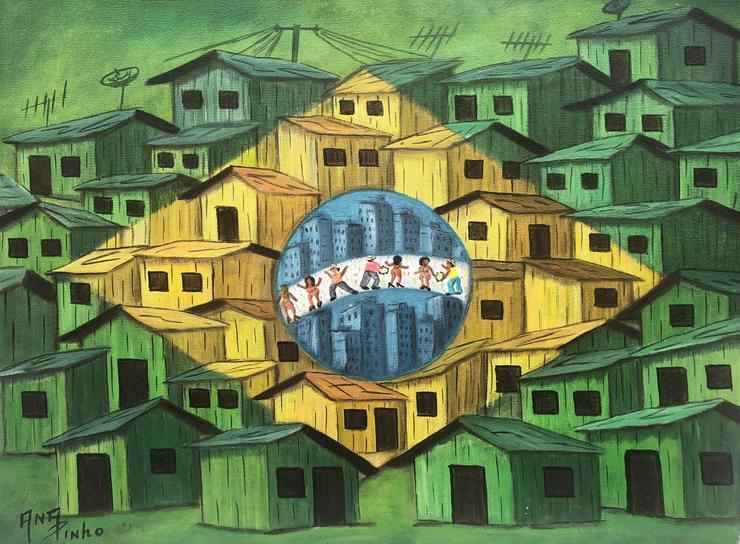

# Data Analysis
** In the data analysis i'm going to have a better look of the data using descriptive analysis, boxplots, violinplots and distribution plots.**
* Are there any missing value?
* What are the data types involved?
* How is the data distributed?
* Are there outliers? if so, should them be removed?
* How features of the same data type relate with each other?
* How features of diferent data type relate with each other?

# Predictive Analysis
**In the predictive analysis the main objective is to try different models and different usage of them in order to reach the best results. Initially, I analysed the models using default hyperparameters. Then, the same models with tunned hyperparameters. The comparison metric used to quantify model adequacy is the Mean Absolute Error.**
.

1. Which of the trained models with default hyperparameters performs better?  
2. Which of the trained models with tunned hyperparameters performs the better?, how is their convergence plot curve?
3. Among all, which one performs the best for this dataset?

**Models used:**
* Linear Regression
* Random Forest Regression
* Extreme Gradient Boosting Regression
* KNN Regression
* Ridge Regression
* Lasso Regression

# Feature Analysis
**The model with the best result is selected for the feature analysis, the objective of this stage is to evaluate the features of the dataset and how usefull are they, the analysis is performed by three methods.**  spoiler alert (there's a surprise)
1. Is correlation a good indicador of good features for this dataset?
2. What are the most relevant features?
3. What is the best combination of features?

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('PS')
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", UserWarning)
                      
%matplotlib inline

#  Data Analysis

In [ ]:
dados=pd.read_csv('/kaggle/input/brasilian-houses-to-rent/houses_to_rent_v2.csv')
print('\n Data info \n',dados.info())
print('\n Data Shape\n ',dados.shape)
print('\n Data TypeS\n ',dados.dtypes)
print('\n Number of missing data\n',dados.isna().sum())
HTML(pd.DataFrame(dados.columns).to_html())

In [ ]:
dados.head()

By now we can see that the dataset have no null values, two data types and **looks good**.    
 Lets try some plots in order to have a better view of the features.

In [ ]:
plt.style.use('seaborn-whitegrid')
dados.hist(bins=30,figsize=(20,20))
plt.show()

In [ ]:
discrete=['city','rooms','bathroom','parking spaces','animal','furniture','floor']
fig,axis=plt.subplots(4,2,figsize=(20,30))
k=0
for discrete in discrete:
    plt.style.use('seaborn-whitegrid')
    data=dados[discrete].value_counts().to_dict()
    axis=axis.flatten()
    sns.countplot(x=dados[discrete],hue=dados[discrete],ax=axis[k])
    k=k+1
plt.show()

**By now we can see that majority of our houses data come from São Paulo, have 1 to 3 rooms,1 bathroom, 1 and 2 parking spaces, accept animals and are not furnished.**


The categorize function bellow as well as the plot of actual/predicted values of the models, were created by G Ranjith kumar (https://www.kaggle.com/granjithkumar)     
and is available in his Kernel https://www.kaggle.com/granjithkumar/what-about-rent-a-deep-data-dive 

In [ ]:
def categorize(columns):
    numerical,nominal=[],[]
    for i in columns:
        if dados[i].dtype==object:
            nominal.append(i)
        else:
            numerical.append(i)
    print('Nominal features {}|:'.format(nominal))
    print('Numerical Features {}:'.format(numerical))
    return nominal,numerical

In [ ]:
nominal,numerical=categorize(dados.columns)


In [ ]:
dados_num=dados.copy()
dados_num=dados_num.drop(nominal,axis=1)
dados_num.describe()

In [ ]:
for i in dados_num:
    r=dados_num[i].describe()
    HTML(pd.DataFrame(r.T).to_html())
    totais=dados_num[i].size
    plt.style.use('seaborn-whitegrid')
    print('\nSkew:',dados_num[i].name,' \n',dados_num[i].skew())
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
    g1=sns.distplot(dados_num[i],ax=ax1,fit=stats.norm,bins=50)
    g2=sns.boxplot(dados_num[i],ax=ax2)
    plt.show()

The distplot shows how the values of each numerical features are distributed as well as it skweness and what a normal distribution of that feature should be.           
With the boxplot of the numerical data we can see that all features have outliers, **which will not be removed duo to the consideration that these outliers are highly important in the compreetion of how the real data is distribuited.**

In [ ]:
sns.pairplot(dados_num)
plt.style.use('seaborn-whitegrid')

In [ ]:
correla=dados_num.corr()
plt.figure(figsize =(8,8))
sns.heatmap(correla,annot =True)
plt.show()
print(correla['rent amount (R$)'].sort_values(ascending=False))

Looking at the pairplot we can see that some features have good correlations, the heatmap of the correlation confirms what is presumed in the pairplot.  
Printing the correlation in relation to rent amount (RS) in a decrescent way, **reveals that hoa (RS) has the lowest linear correlation of all,** keep that in mind.

Now let's have a look at the nominal features and how they relate with each other.

In [ ]:
for i in nominal:
    k=0
    fig,axis=plt.subplots(2,2,figsize=(20,25))
    for j in nominal:
        plt.style.use('seaborn-whitegrid')
        axis=axis.flatten()
        imag=sns.countplot(x=dados[i],hue=dados[j],data=dados,ax=axis[k])
        k=k+1
    plt.show()

The variable *FLOOR* its quite messy for visualization, lets remove it for the next plot.   
Let's se how the nominal features relate with the numerical features, and their distribution with violinplot.

In [ ]:
nominal2=nominal.copy()
nominal2.remove('floor')
print(nominal2)

In [ ]:
for i in nominal2:
    k=0
    fig,axis=plt.subplots(5,2,figsize=(20,35))
    fig2,axis2=plt.subplots(5,2,figsize=(20,35))
    for j in numerical:
        axis=axis.flatten()
        axis2=axis2.flatten()
        sns.countplot(x=dados[j],hue=dados[i],data=dados,ax=axis[k])
        sns.violinplot(x=dados[i],y=dados[j],hue=dados[i],data=dados,ax=axis2[k])
        plt.style.use('seaborn-whitegrid')
        k=k+1
    plt.show()

**With all this plots we can have a really good knowledge of the dataset.    
Lets prepare the nominal features for the regression models using LabelEncoder.**

In [ ]:
dados_enc=dados.copy()
lb_make=LabelEncoder()
for i in nominal:
    dados_enc[i]=lb_make.fit_transform(dados_enc[i])
dados_enc.head()

# Predictive Analysis 1.0
**For the predictive Analysis we will use the models below with default values for the hyperparameters.**

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(dados_enc.drop(['rent amount (R$)'],axis=1),dados_enc['rent amount (R$)'],
                                               train_size=0.7,random_state=42)


In [ ]:
name_list=[]
model_list=[]
MAE_list=[]

# Linear Regression
[https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html](http://)

In [ ]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression(n_jobs=-1)
model_lr.fit(x_train,y_train)
MAE=(mean_absolute_error(y_test,model_lr.predict(x_test)))
name='Linear Reg'
name_list.append(name);model_list.append(model_lr);MAE_list.append(MAE)

# Random Forest Regressor
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [ ]:
from sklearn.ensemble import RandomForestRegressor 
model_rf =RandomForestRegressor(random_state=42)
model_rf.fit(x_train,y_train)
MAE=mean_absolute_error(y_test,model_rf.predict(x_test))
name='Random Forest Reg'
name_list.append(name);model_list.append(model_rf);MAE_list.append(MAE)

# XGB Regressor 
https://xgboost.readthedocs.io/en/latest/parameter.html

In [ ]:
from xgboost import XGBRegressor 
model_xgbr =XGBRegressor(objective="reg:squarederror")
model_xgbr.fit(x_train,y_train)
MAE=(mean_absolute_error(y_test,model_xgbr.predict(x_test)))
name='XGB Reg'
name_list.append(name);model_list.append(model_xgbr);MAE_list.append(MAE)

# KNN Regressor
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model_knn =KNeighborsRegressor()
model_knn.fit(x_train,y_train)
MAE=(mean_absolute_error(y_test,model_knn.predict(x_test)))
name='KNN Reg'
name_list.append(name);model_list.append(model_knn);MAE_list.append(MAE)

# Ridge Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [ ]:
from sklearn.linear_model import Ridge 
model_rid=Ridge(random_state=42)
model_rid.fit(x_train,y_train)
MAE=(mean_absolute_error(y_test,model_rid.predict(x_test)))
name='Ridge Reg'
name_list.append(name);model_list.append(model_rid);MAE_list.append(MAE)

# Lasso Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [ ]:
from sklearn.linear_model import Lasso 
model_las =Lasso(random_state=42,max_iter=30000)
model_las.fit(x_train,y_train)
MAE=(mean_absolute_error(y_test,model_las.predict(x_test)))
name='Lasso Reg'
name_list.append(name);model_list.append(model_las);MAE_list.append(MAE)

In [ ]:
fig,axis=plt.subplots(3,2,figsize=(20,25))
for i in range(len(name_list)):
    print('Name= {}  MAE = {} \n'.format(name_list[i],MAE_list[i]))
    axis=axis.flatten()
    ax1=sns.distplot(y_test,hist=False,kde =True,color ="r",label ="Actual Value",ax=axis[i])
    sns.distplot(model_list[i].predict(x_test),color ="b",hist = False,kde =True, label = "Preicted Value",ax=axis[i]).set_title('Name= {}  MAE = {} \n'.format(name_list[i],MAE_list[i]))
    plt.style.use('seaborn-whitegrid')
plt.show()

**Ridge Regression have the best result of MAE of all trained models with default hyperparameters. Let's try to make better results with hyperparameter tunning.**


# Predictive Analysis 2.0
**For the predictive Analysis 2.0 we will use the same models, however we will search for the best tune of the hyperparameters of each model in orther to search the best results for each one.**  

**For that we will use the gp_minimize function from Skopt.   **

**In each model will be displayed the lowest value reached of MAE, and the hyperparameters that resulted in this value. At the end will be displayed the best values as well as the convergence plot for each model.
**


([https://scikit-optimize.github.io/stable/modules/generated/skopt.gp_minimize.html](http://)) ->gp_minimize

In [ ]:
from skopt import dummy_minimize,gp_minimize
from skopt.plots import plot_convergence

In [ ]:
name_list_mini=[]
MAE_list_mini=[]
name_result_mini=[]

In [ ]:
def train_model_lr(param):
    normalize=param[0]
    
    mdl=LinearRegression(normalize=normalize,n_jobs=-1)
    mdl.fit(x_train,y_train)
    return mean_absolute_error(y_test,mdl.predict(x_test))

space=[(True,False)]
result_lr=gp_minimize(train_model_lr,space,random_state=42,n_calls=30,n_random_starts=10)

print('Mean absolute error: ',result_lr.fun,'Best parameters:normalize=%s'%(result_lr.x[0]))

name_list_mini.append('Linear Reg');name_result_mini.append(result_lr);MAE_list_mini.append(result_lr.fun)

In [ ]:
def train_model_rf(param):
    n_estimators,criterion,max_depth,min_samples_split,min_samples_leaf,min_weight_fraction_leaf,max_features,max_leaf_nodes,oob_score,warm_start=(param[0],
                                        param[1],param[2],param[3],param[4],param[5],param[6],param[7],param[8],param[9])

    mdl=RandomForestRegressor(n_estimators=n_estimators,criterion=criterion,max_depth=max_depth,min_samples_split=min_samples_split,oob_score=oob_score,warm_start=warm_start,
                              min_weight_fraction_leaf=min_weight_fraction_leaf,max_features=max_features,max_leaf_nodes=max_leaf_nodes,random_state=42)
    mdl.fit(x_train,y_train)
    return mean_absolute_error(y_test,mdl.predict(x_test))

space=[(10,1000),('mse','mae'),(1,10),(2,10),(1,10),(0,0.5),('auto','sqrt','log2'),(2,10),(bool,False),(bool,False)]
result_rf=gp_minimize(train_model_rf,space,random_state=42,n_calls=30,n_random_starts=10)

print('Mean absolute error: ',result_rf.fun,
      'Best parameters:n_estimators= %6f,criterion=%s,max_depth=%6f,min_samples_split=%6f,min_samples_leaf=%6f,min_weight_fraction_leaf=%6f,max_features=%s,max_leaf_nodes=%6f,oob_score=%s,warm_start=%s'%
                                                (result_rf.x[0],result_rf.x[1],result_rf.x[2],result_rf.x[3],result_rf.x[4],result_rf.x[5],result_rf.x[6],result_rf.x[7],result_rf.x[8],result_rf.x[9]))

name_list_mini.append('Random Forest Reg');name_result_mini.append(result_rf);MAE_list_mini.append(result_rf.fun)

In [ ]:
def train_model_xgbr(param):
    booster,reg_lambda,alpha,update,feature_selector,rate_drop,normalize_type=param[0],param[1],param[2],param[3],param[4],param[5],param[6]

    mdl_xgbr=XGBRegressor(objective="reg:squarederror",booster=booster,reg_lambda=reg_lambda,alpha=alpha,update=update,feature_selector=feature_selector,rate_drop=rate_drop,normalize_type=normalize_type)
    mdl_xgbr.fit(x_train,y_train)
    return mean_absolute_error(y_test,mdl_xgbr.predict(x_test))

space=[('gblinear','gbtree','dart'),(0,5),(0,5),('shotgun','coord_descent'),('cyclic','shuffle'),(0,1),('tree','forest')]
result_xgbr=gp_minimize(train_model_xgbr,space,random_state=42,n_calls=30,n_random_starts=10)

print('Mean absolute error: ',result_xgbr.fun,
      'Best parameters:booster=%s,reg_lambda=%6f,alpha=%6f,update=%s,feature_selector=%s,rate_drop=%6f,normalize_type=%s'%
                          (result_xgbr.x[0],result_xgbr.x[1],result_xgbr.x[2],result_xgbr.x[3],result_xgbr.x[4],result_xgbr.x[5],result_xgbr.x[6]))

name_list_mini.append('XGBR Reg');name_result_mini.append(result_xgbr);MAE_list_mini.append(result_xgbr.fun)

In [ ]:
def train_model_knn(param):
    n_neighbors,weights,algorithm,leaf_size,p=param[0],param[1],param[2],param[3],param[4] 

    mdl=KNeighborsRegressor(n_neighbors=n_neighbors,weights=weights,algorithm=algorithm,leaf_size=leaf_size,p=p)
    mdl.fit(x_train,y_train)
    return mean_absolute_error(y_test,mdl.predict(x_test))

space=[(1,10),('uniform','distance'),('auto','ball_tree','kd_tree','brute'),(15,50),(1,2)]
result_knn=gp_minimize(train_model_knn,space,random_state=42,n_calls=30,n_random_starts=10)

print('Mean absolute error: ',result_knn.fun,'.Best parameters:n_estimators=%6f, weights=%s, algorithm=%s, leaf_size=%6f, p=%6f '%
                                                                          (result_knn.x[0],result_knn.x[1],result_knn.x[2],result_knn.x[3],result_knn.x[4]))

name_list_mini.append('KNN Reg');name_result_mini.append(result_knn);MAE_list_mini.append(result_knn.fun)

In [ ]:
def train_model_ridge_reg(param):
    alpha,normalize,tol,solver,max_iter=param[0],param[1],param[2],param[3],param[4]

    mdl=Ridge(alpha=alpha,normalize=normalize,tol=tol,solver=solver,max_iter=max_iter,random_state=42)
    mdl.fit(x_train,y_train)
    return mean_absolute_error(y_test,mdl.predict(x_test))

space=[(0.1,10),(bool,False),(1e-9,1),('auto','svd','cholesky','lsqr','sparse_cg'), (500,5000)]
result_rr=gp_minimize(train_model_ridge_reg,space,random_state=42,n_calls=30,n_random_starts=10)

print('Mean absolute error: ',result_rr.fun,'.Best parameters: alpha=%6f, normalize=%s, tol=%6f, solver =%s,max_iter=%6f'%
                                                                          (result_rr.x[0],result_rr.x[1],result_rr.x[2],result_rr.x[3],result_rr.x[4]))

name_list_mini.append('Ridge Reg');name_result_mini.append(result_rr);MAE_list_mini.append(result_rr.fun)

In [ ]:
def train_model_lasso(param):
    alpha,normalize,tol,warm_start,positive,selection,precompute=param[0],param[1],param[2],param[3],param[4],param[5],param[6]
    
    mdl=Lasso(alpha=alpha,normalize=normalize,max_iter=30000,tol=tol,warm_start=warm_start,positive=positive,selection=selection,random_state=42,precompute=precompute)
    mdl.fit(x_train,y_train)
    return mean_absolute_error(y_test,mdl.predict(x_test))

space=[(0.1,10),(bool,False),(1e-9,1),(bool,False),(bool,False,True),('cyclic','random'),(False,True)]
result_lasso=gp_minimize(train_model_lasso,space,random_state=42,n_calls=30,n_random_starts=10)

print('Mean absolute error: ',result_lasso.fun,'.Best parameters:alpha= %6f, normalize=%s, tol=%9f, warm_start=%s, positive=%6s, selection=%s, precompute=%s'%
                                                                          (result_lasso.x[0],result_lasso.x[1],result_lasso.x[2],result_lasso.x[3],result_lasso.x[4],result_lasso.x[5],result_lasso.x[6]))

name_list_mini.append('Lasso Reg');name_result_mini.append(result_lasso);MAE_list_mini.append(result_lasso.fun)

In [ ]:
fig,axis=plt.subplots(3,2,figsize=(20,20))
for i in range(len(name_list)):
    print('{}  MAE = {} \n'.format(name_list_mini[i],MAE_list_mini[i]))
    axis=axis.flatten()
    plot_convergence(name_result_mini[i],ax=axis[i]).set_title('Convergence plot {}   MAE = {} \n'.format(name_list_mini[i],MAE_list_mini[i]))
    plt.style.use('seaborn-whitegrid')
plt.show()

# # Feature Analysis 1.0
**In this feature analysis is used SelectKBest function  to select de K best features. The K number goes from 1 to len(x_train) which is 12. The best features are selected according to f_regression  features used are those who decrease the mean absolute error value.**

(https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) -> SelectKBest   
(https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression) -> F_regression

In [ ]:
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.ensemble import RandomForestRegressor

k_vs_scoremae=[]
for k in range(1,len(x_train.columns)+1,1):
    selector=SelectKBest(score_func=f_regression,k=k)
    xtrain2=selector.fit_transform(x_train,y_train)
    xval2=selector.transform(x_test)
    mdl=Ridge(alpha=6.213067, normalize=False, tol=0.007066, solver ='auto',max_iter=2861.000000,random_state=42)
    mdl.fit(xtrain2,y_train)
    p=mdl.predict(xval2)
    mask=selector.get_support()
    columns_selected=pd.Index.tolist((x_test.columns[mask]))
    scoremae=mean_absolute_error(y_test,p)
    print('k= {}     -  MAE = {}   -Selected columns = {} \n'.format(k,scoremae,columns_selected))
    k_vs_scoremae.append(scoremae)

**We can see that the feature that causes the MAE value to decrease the most is hoa (RS), but didn't hoa (RS) had the worst correlation value with rent?. (you can verify it in data analysis section)**

In [ ]:
fig,axis=plt.subplots(1,1,figsize=(10,8))
sns.lineplot(range(1,len(x_train.columns)+1,1),k_vs_scoremae,ax=axis)
plt.style.use('seaborn-whitegrid')
axis.set_title('MAE x variables')
plt.show()

In [ ]:
print(pd.concat([pd.Series(selector.scores_,index=x_train.columns,name='F Regression'),
                  pd.Series(selector.pvalues_,index=x_train.columns,name= 'P values')],axis=1).sort_values(by='F Regression',ascending=False))

**Printing the F regression value and the P Values reveals again that hoa (RS) has no linear correlation to rent.**

# Feature Analysis 2.0
**After seeing that the linear correlation between features and target isn't a good indicator of good features, let's see what features helps our model the most. **

In [ ]:
from sklearn.feature_selection import SelectFromModel
k_vs_score2=[]

for l in range(1,len(x_train.columns)+1,1):
    selector_model=Ridge(alpha=6.213067, normalize=False, tol=0.007066, solver ='auto',max_iter=2861.000000,random_state=42)
    selector=SelectFromModel(selector_model,max_features=l,threshold=-np.inf)
    x_train2=selector.fit_transform(x_train,y_train)
    x_test2=selector.transform(x_test)
    
    mdl=Ridge(alpha=6.213067, normalize=False, tol=0.007066, solver ='auto',max_iter=2861.000000,random_state=42)
    mdl.fit(x_train2,y_train)
    p=mdl.predict(x_test2)
    mask2=selector.get_support()
    columns_selected2=pd.Index.tolist((x_test.columns[mask2]))
    scoremae2=mean_absolute_error(y_test,p)
    k_vs_score2.append(scoremae2)
    print('l= {}     -MAE = {}   -Selected columns = {} \n'.format(l,scoremae2,columns_selected2))
    k_vs_scoremae.append(scoremae)

**The combination of the best features according to SelectFromModel is Selected columns = 'hoa (RS)', 'property tax (RS)', 'fire insurance (RS)', 'total (RS)', those features results in a  MAE off 0.5657775772392593.**

In [ ]:
fig,axis=plt.subplots(1,1,figsize=(10,8))
sns.lineplot(range(1,len(x_train.columns)+1,1),k_vs_score2,ax=axis)
plt.style.use('seaborn-whitegrid')
axis.set_title('MAE x variables')
plt.show()

**Here's the plot of how the MAE value decreases by adding new features.**

In [ ]:
pd.Series(k_vs_score2[3:],index=range(3,x_train.shape[1],)).plot(figsize=(10,7))

**The same plot as above but starting at l=4, or 3 in X scale. **

# # Feature Analysis 3.0
**Let's try to search for the best combination of features manually. **

In [ ]:
score_past=500

k_vs_score3=[]
for j in range(1,len(x_train.columns)+1,1):
    for seed in range(1000):
        selected=np.random.choice(x_train.columns,j,replace=False)

        x_train2=x_train[selected]
        x_test2=x_test[selected]

        mdl=Ridge(alpha=6.213067, normalize=False, tol=0.007066, solver ='auto',max_iter=2861.000000,random_state=42)
        mdl.fit(x_train2,y_train)
        p=mdl.predict(x_test2)
        score=mean_absolute_error(y_test,p)
        k_vs_score3.append(score)
        if score<score_past:
            print('Number of features = {} seed = {} - MAE = {} - Features ={} \n'.format(j,seed,score,selected))
            score_past=score

**So the best combination of features are 'total (RS)', 'hoa (RS)', 'fire insurance (RS)', 'property tax (Rs)', 'area', 
 'furniture', lets try only these features in the best model.**

In [ ]:
x_train3,x_test3,y_train3,y_test3=train_test_split(dados_enc[['total (R$)','hoa (R$)','fire insurance (R$)','property tax (R$)','area',
 'furniture'] ],dados_enc['rent amount (R$)'],train_size=0.7,random_state=42)

In [ ]:
model_lr3=Ridge(alpha=6.213067, normalize=False, tol=0.007066, solver ='auto',max_iter=2861.000000,random_state=42)
model_lr3.fit(x_train3,y_train3)
MAE=(mean_absolute_error(y_test3,model_lr3.predict(x_test3)))
print(MAE)

# Conclusion
**In conclusion, the lowest value reached of mean absolute error is 0.5641291781268625 using Ridge Regression with features from Feature Analysis 3.0. 
The best features selected are for the Ridge Regression model, for the other models might be different features it needs to be tested.
About the feature importance and the difference from the resulted in the linear correlation, suspect that they don't have linear correlation, but instead non-linear correlation,which goes beyond my knowledge.**

**I hope you enjoyed my first notebook, if you have any question, suggestion or advise post it in comment section **

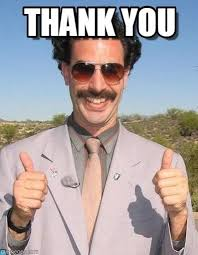